<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Add_Two_Numbers_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

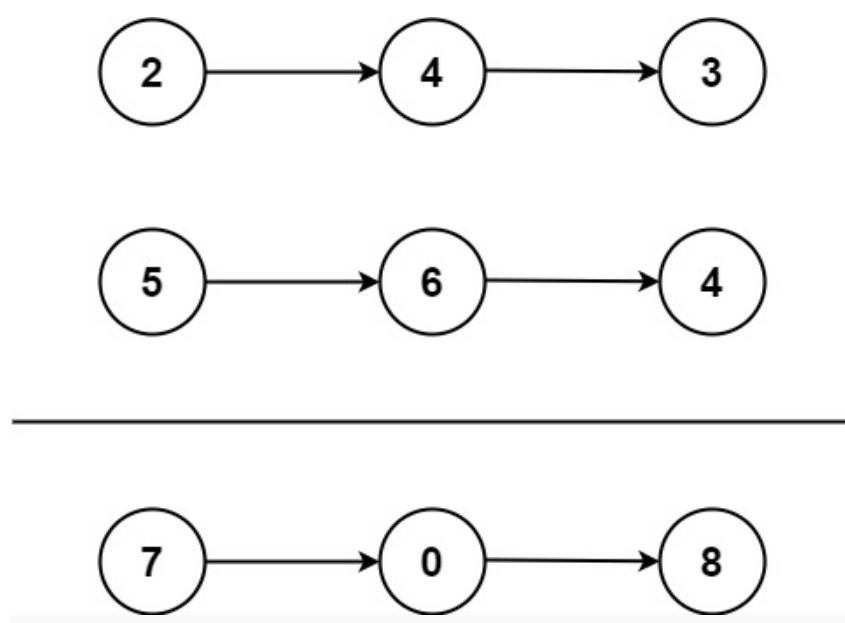

```
Input: l1 = [2,4,3], l2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.
```



Example 2:

```
Input: l1 = [0], l2 = [0]
Output: [0]
```



Example 3:

```
Input: l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]
Output: [8,9,9,9,0,0,0,1]
```



# Given

In [1]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def __str__(self):
        print_linkedlist = ''
        current_node = self
        while current_node != None:
          print_linkedlist += str(current_node.val)
          if current_node.next != None:
            print_linkedlist += ' -> '
          current_node = current_node.next
        return print_linkedlist

In [2]:
def create_list_node(array):
  head = None
  for num in array:
    if head == None:
      head = ListNode(num)
      node = head
    else:
      node.next = ListNode(num)
      node = node.next
  
  return head

# Solution 1

In [3]:
# Time = O(max(n, m))
# Space = O(max(n, m))

# n = number of element in l1
# m = number of element in l2

class Solution:
    def addTwoNumbers(self, l1, l2):
        pointer1 = l1
        pointer2 = l2
        output = None
        remain = 0
        while pointer1 != None or pointer2 != None:
            if pointer1 != None and pointer2 != None:
                sum = pointer1.val + pointer2.val + remain
                pointer1 = pointer1.next
                pointer2 = pointer2.next
            elif pointer1 == None:
                sum = pointer2.val + remain
                pointer2 = pointer2.next
            elif pointer2 == None:
                sum = pointer1.val + remain
                pointer1 = pointer1.next
            
            if output == None:
                output = ListNode(sum % 10)
                node = output
            else:
                node.next = ListNode(sum % 10)
                node = node.next
            remain = sum // 10
        
        if remain != 0:
            node.next = ListNode(remain)
        
        return output
                

In [4]:
l1 = create_list_node([2, 4, 3])
l2 = create_list_node([5, 6, 4]) 
expected = create_list_node([7, 0, 8]) 

output = Solution().addTwoNumbers(l1, l2)
print(output)

assert output.__str__() == expected.__str__()

7 -> 0 -> 8


In [5]:
l1 = create_list_node([0])
l2 = create_list_node([0]) 
expected = create_list_node([0]) 

output = Solution().addTwoNumbers(l1, l2)
print(output)

assert output.__str__() == expected.__str__()

0


In [6]:
l1 = create_list_node([9,9,9,9,9,9,9])
l2 = create_list_node([9,9,9,9]) 
expected = create_list_node([8,9,9,9,0,0,0,1]) 

output = Solution().addTwoNumbers(l1, l2)
print(output)

assert output.__str__() == expected.__str__()

8 -> 9 -> 9 -> 9 -> 0 -> 0 -> 0 -> 1


# Solution 2: refactor

In [7]:
# Time = O(max(n, m))
# Space = O(max(n, m))

# n = number of element in l1
# m = number of element in l2

class Solution:
    def addTwoNumbers(self, l1, l2):
        pointer1 = l1
        pointer2 = l2
        dummyhead = ListNode(0)
        node = dummyhead
        remain = 0
        while pointer1 != None or pointer2 != None:
            value1 = pointer1.val if pointer1 != None else 0
            value2 = pointer2.val if pointer2 != None else 0
            sum = value1 + value2 + remain

            node.next = ListNode(sum % 10)
            node = node.next
            remain = sum // 10

            if pointer1 != None: pointer1 = pointer1.next
            if pointer2 != None: pointer2 = pointer2.next
        
        if remain != 0:
            node.next = ListNode(remain)
        
        return dummyhead.next

In [8]:
l1 = create_list_node([2, 4, 3])
l2 = create_list_node([5, 6, 4])

expected = create_list_node([7, 0, 8]) 
output = Solution().addTwoNumbers(l1, l2)
print(output)

assert output.__str__() == expected.__str__()

7 -> 0 -> 8


In [9]:
l1 = create_list_node([0])
l2 = create_list_node([0])

expected = create_list_node([0]) 
output = Solution().addTwoNumbers(l1, l2)
print(output)

assert output.__str__() == expected.__str__()

0


In [10]:
l1 = create_list_node([9,9,9,9,9,9,9])
l2 = create_list_node([9,9,9,9]) 

expected = create_list_node([8,9,9,9,0,0,0,1]) 
output = Solution().addTwoNumbers(l1, l2)
print(output)

assert output.__str__() == expected.__str__()

8 -> 9 -> 9 -> 9 -> 0 -> 0 -> 0 -> 1
